In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
import seaborn as sns
import scipy
from sklearn.metrics import mean_squared_error
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.floating_axes as FA
import mpl_toolkits.axisartist.grid_finder as GF
import matplotlib
import matplotlib.collections as collections
import regionmask


In [2]:
pmip_v4='PMIP4'
pmip_v3='PMIP3'
pmip={}
pmip['PMIP4']=['AWI-CM-1-1-LR',
               'CESM2',
               'EC-EARTH-3-3',
               'FGOALS-f3-L',
               'FGOALS-g3',
               'GISS-E2-1-G',
               'HadGEM3-GC31',
               'IPSL-CM6A-LR',
               'MIROC-ES2L',
               'MPI-ESM1-2-LR',
               'MRI-ESM2-0',
               'NESM3',
               'NorESM1-F',
               'NorESM2',
               'UofT-CCSM-4']
pmip['PMIP3']=['BCC-CSM1-1',
               'CCSM4',
               'CNRM-CM5',
               'CSIRO-Mk3L-1-2',
               'CSIRO-Mk3-6-0',
               'EC-EARTH-2-2',
               'FGOALS-g2',
               'FGOALS-s2',
               'GISS-E2-R',
               'HadGEM2-CC',
               'HadGEM2-ES',
               'IPSL-CM5A-LR',
               'KCM1-2-2',
               'MIROC-ESM',
               'MPI-ESM-P',
               'MRI-CGCM3']
               
               

# recons data from Bartlein et al., 2010

In [3]:
# define a longitude latitude grid
lon_2 = np.arange(-179, 180,2)
lat_2 = np.arange(-89, 90,2)

srex_mask = regionmask.defined_regions.srex.mask(lon_2, lat_2, xarray=False)

# region numbers
#NEU 11
#CEU 12
#MED 13
#SAH 14
#EAS 22
#ENA 5

#Define SREX regions and their corresponding number used in plotting

SREXmask={'NEU':[11],'CEU':[12],'MED':[13],'SAH':[14],'EAS':[22],'ENA':[5]}
regions=['NEU','CEU','MED','SAH','EAS','ENA']

#SREXmask={'TIB':[21],'CAS':[20]}
#regions=['TIB','CAS']

#masking example:
#c=ma.masked_where(mask!=14, testdata)

In [4]:
# collect recons point values within each region
recons_data={}
def recons_data_map(map_recons,region):
    re=[]
    region=region
    c=ma.masked_where(srex_mask!=SREXmask[region][0], map_recons)
    xnan=np.ma.filled(c.astype(float), np.nan)
    for row in range(90):
        for col in range(180):
            val=str(xnan[row][col])
            if val != 'nan':
                re.append(val)
    recons_data[region]=re

#create recons dataset
def recons_data(regions,map_recons):
    RECONS={}
    recons_data=[]
    for region in regions:
        re=[]
        region=region
        c=ma.masked_where(srex_mask!=SREXmask[region][0], map_recons)
        xnan=np.ma.filled(c.astype(float), np.nan)
        for row in range(90):
            for col in range(180):
                val=str(xnan[row][col])
                if val != 'nan':
                    re.append(val)
        RECONS[region]=np.array(re).astype(float)
        recons_data.append(RECONS[region])
    return RECONS,recons_data

In [5]:
#Reconstruction data over land (source: Bartlein et al., 2010)
recons_filename='mh_recons/map_delta_06ka_ALL_grid_2x2.nc'
d=Dataset(recons_filename)
map_recons=d.variables['map_anm_mean'][:]
d.close()

In [6]:
data,recons=recons_data(regions,map_recons)

In [7]:
data

{'NEU': array([ 3.60476646e+01,  3.05150223e+00,  4.10676689e+01,  1.31767242e+02,
        -7.08100653e+00,  1.10675995e+02, -8.98816776e+00,  2.76747398e+01,
        -1.18465042e+01,  6.59932556e+01, -1.42975044e+01,  3.00966702e+01,
         1.32300949e+00,  3.55403709e+01,  2.72914963e+01,  6.02882500e+01,
         1.05744247e+02,  8.94112015e+01, -7.12999964e+00,  1.01733505e+02,
        -2.68125038e+01,  8.27993240e+01,  1.90649979e+02,  8.35625000e+01,
         6.13004990e+01,  6.20340004e+01,  4.27429962e+01, -7.34104919e+01,
        -2.08010101e+01,  4.16145020e+01,  1.85104004e+02, -3.09635986e+02,
         1.19100189e+00,  8.72321777e+01,  1.64583603e+02,  6.15302505e+01,
         2.04815006e+01,  1.18679001e+02,  1.12873550e+02,  1.28560822e+02,
         1.10400002e+02,  7.26316071e+01, -2.23840008e+01,  1.46511246e+02,
        -1.66687256e+02,  1.78184967e+01,  5.24336662e+01,  1.35388245e+02,
        -3.53330040e+01, -6.14750061e+01,  8.71646652e+01,  2.10990860e+02,
     

{'whiskers': [<matplotlib.lines.Line2D at 0x11ec35f50>,
 'caps': [<matplotlib.lines.Line2D at 0x11ec429d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ec35250>,
 'medians': [<matplotlib.lines.Line2D at 0x11ee65090>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ec4b950>,
 'means': []}

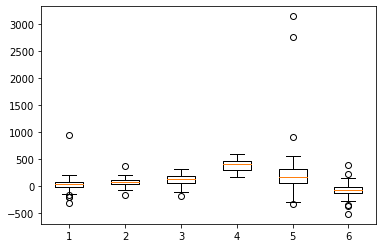

In [8]:
pp=[1,2,3,4,5,6]
plt.figure()
plt.boxplot(recons,positions=pp,widths=0.5)


# PMIP mean annual precipitation changes

In [7]:
#No change needs here

'''Define calculating functions'''

#This function will get all available experiment names
def experimentlist():
    exps=[]
    file_path = "../DATA" 
    for dirpaths, dirnames, filenames in os.walk(file_path):
        for d in dirnames:
            exps.append(d)
    return exps

#This function will get all available model names in the experiment 
def modellist(experiment_name):
    models=[]
    file_path = "../DATA/%s" %(experiment_name)
    for dirpaths, dirnames, filenames in os.walk(file_path):
        for f in filenames:
            mname=f.split("_")[0]
            models.append(mname)
    return models

#This function will get all available filenames in the experiment 
def filenamelist(experiment_name):
    filenames=[]
    file_path = "../DATA/%s" %(experiment_name)
    for dirpaths, dirnames, files in os.walk(file_path):
        for f in files:
            ff='../DATA/%s/%s'%(experiment_name,f)
            filenames.append(ff)
    return filenames

#This function will identify models in the ensemble
def identify_ensemble_members(variable_name,experiment_name):
    datadir="../DATA/%s" %(experiment_name)
    ensemble_members=!scripts/find_experiment_ensemble_members.bash {experiment_name} {variable_name} {datadir}
    return ensemble_members

#This function will list excat model name
def extract_model_name(filename):
    file_no_path=filename.rpartition("/")
    file_strings=file_no_path[2].partition("_")
    model_name=file_strings[0]
    return model_name

def ensemble_members_dict(variable_name,experiment_name):
    ens_mems=identify_ensemble_members(variable_name,experiment_name)
    ens_mems_dict={extract_model_name(ens_mems[0]):ens_mems[0]}
    for mem in ens_mems[1:]:
        ens_mems_dict[extract_model_name(mem)]=mem
    return ens_mems_dict
    
#This function will calculate the difference between experiment and piControl for each model, 
#and then calculate the ensemble average of the differences
#mon1=[31,28,31,30,31,30,31,31,30,31,30,31]
#mon2=[32,30,32,31,31,29,30,29,29,30,30,32]
#mon22=[32.4841185,29.53995521,32.47169095,30.80519959,30.97070708,29.16304027,29.54741870,29.34677894,28.62575603,30.18400184,30.01008258,31.85125027]
mon=[31,28,31,30,31,30,31,31,30,31,30,31]
def precip_change(pmip_v,experiment_name,variable_name):
    model_list=[]
    PR=[]
    PRECIP=[]
    A_dict=ensemble_members_dict(variable_name,experiment_name)
    B_dict=ensemble_members_dict(variable_name,'piControl')
    for gcm in A_dict:
        if gcm in B_dict:
            if gcm in pmip[pmip_v]:
                model_list.append(gcm)
                dA=Dataset(A_dict.get(gcm))
                mA=dA.variables[variable_name]
                cyA=mA.getncattr('AnnCycle')
                dA.close()
                dB=Dataset(B_dict.get(gcm))
                mB=dB.variables[variable_name]
                cyB=mB.getncattr('AnnCycle')
                dB.close()
                pr1=np.zeros(12)
                pr2=np.zeros(12)
                for i in range(12):
                    pr1[i]=cyA[i]-cyB[i]
                    pr2[i]=mon[i]*pr1[i]
                prr=np.sum(pr2)
                PR.append(prr)
                PRECIP.append([gcm,prr])
    f3='model_lists/%s_%s_%s_ipcc_modellist.csv' %(experiment_name,variable_name,pmip_v)
    modellist=pd.DataFrame(model_list)
    modellist.to_csv(f3)
    f4='model_lists/%s_%s_%s_ipcc_data.csv' %(experiment_name,variable_name,pmip_v)
    data=pd.DataFrame(PRECIP)
    data.to_csv(f4)
    return model_list,PR

def pmip_data_frame():
    region_name='ipcc_MED_pr' 
    model_list3,data3=precip_change(pmip_v3,'midHolocene',region_name)
    model_list4,data4=precip_change(pmip_v4,'midHolocene',region_name)
    d3={}
    for m in model_list3:
        d3[m]=[]
    d4={}
    for m in model_list4:
        d4[m]=[]
    for r in regions:
        region_name='ipcc_%s_pr' %r
        model_list3,data3=precip_change(pmip_v3,'midHolocene',region_name)
        model_list4,data4=precip_change(pmip_v4,'midHolocene',region_name)
        for i,m in enumerate(model_list4):
            d4[m].append(data4[i])
        for i,m in enumerate(model_list3):
            d3[m].append(data3[i])
    return model_list3,d3,model_list4,d4



    


In [8]:
model_list3,d3,model_list4,d4=pmip_data_frame()

# Plotting

In [9]:
#Generate plotting positions 
p1=[0.3,1.3,2.3,3.3,4.3,5.3]
p2=[0.5,1.5,2.5,3.5,4.5,5.5]
p3=[0.7,1.7,2.7,3.7,4.7,5.7]
#Generate ref. lines
xlines=[1,2,3,4,5]
ylines=[-500,0,500]

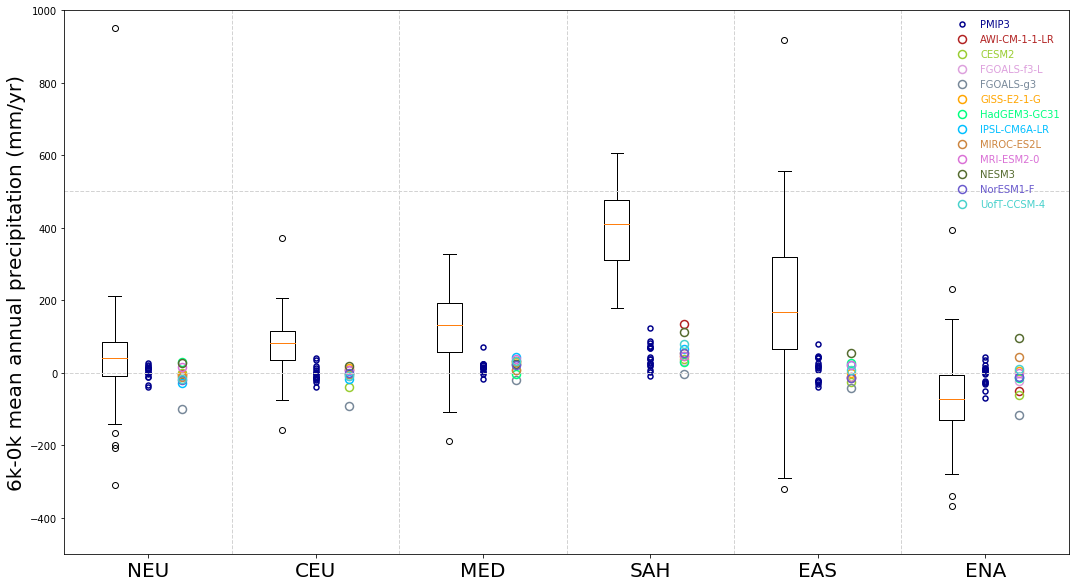

In [24]:

colorst =['firebrick','yellowgreen','plum','lightslategray','orange','springgreen','deepskyblue','peru','orchid','darkolivegreen','slateblue','mediumturquoise']
plt.figure(figsize=(18,10))
plt.ylim((-500,1000))
plt.xlim((0,6))
plt.boxplot(recons,positions=p1,widths=0.15)
for i in range(len(model_list3)):
    plt.plot(p2,d3[model_list3[i]],marker='o', color='darkblue',fillstyle='none',mew=1.5, ms=5,linestyle='None')
plt.plot(p2,d3[model_list3[0]],marker='o', color='darkblue',fillstyle='none',mew=1.5, ms=5,linestyle='None',label='PMIP3')
for i in range(len(model_list4)):
    plt.plot(p3,d4[model_list4[i]],marker='o',color=colorst[i],fillstyle='none',mew=1.5, ms=8,linestyle='None',label=model_list4[i])
plt.xticks(p2,regions,fontsize=20)
leg=plt.legend(edgecolor='None',facecolor='None')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
for xi in xlines:
    plt.axvline(xi,color='lightgrey',linestyle="--",linewidth=1)
for yi in ylines:
    plt.axhline(yi,color='lightgrey',linestyle="--",linewidth=1)
plt.ylabel('6k-0k mean annual precipitation (mm/yr)',fontsize=20) 

plt.savefig('figs/DMC_map.png')


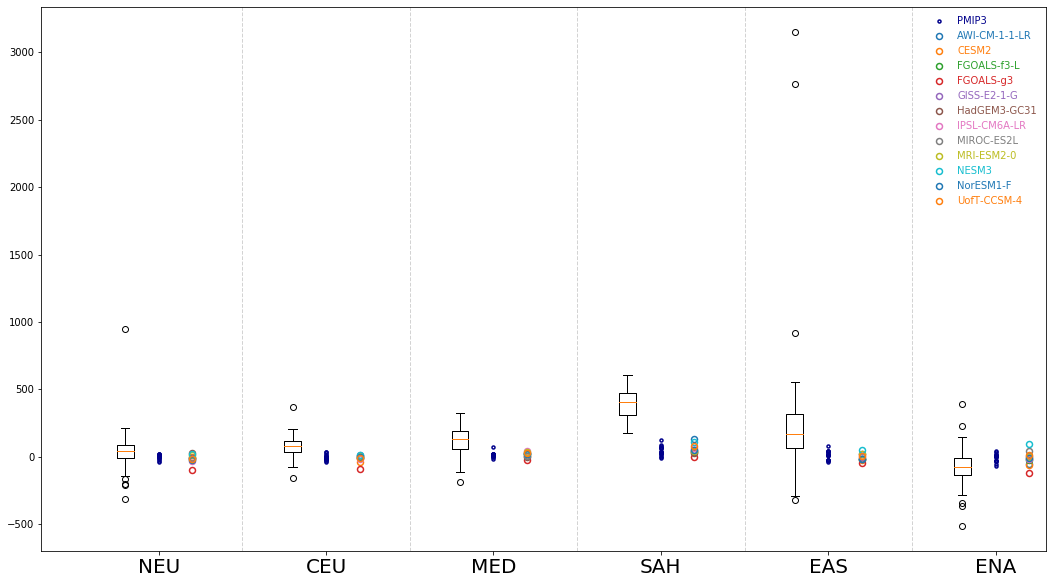

In [19]:
plt.figure(figsize=(18,10))
#plt.ylim((-500,1000))
#plt.xlim((0,6))
plt.boxplot(recons,positions=p1,widths=0.1)
for i in range(len(model_list3)):
    plt.plot(p2,d3[model_list3[i]],marker='o', color='darkblue',fillstyle='none',mew=1.5, ms=3,linestyle='None')
plt.plot(p2,d3[model_list3[0]],marker='o', color='darkblue',fillstyle='none',mew=1.5, ms=3,linestyle='None',label='PMIP3')
for i in range(len(model_list4)):
    plt.plot(p3,d4[model_list4[i]],marker='o',fillstyle='none',mew=1.5, ms=6,linestyle='None',label=model_list4[i])
plt.xticks(p2,regions,fontsize=20)
leg=plt.legend(edgecolor='None',facecolor='None')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
for xi in xlines:
    plt.axvline(xi,color='lightgrey',linestyle="--",linewidth=1)
#for yi in ylines:
#    plt.axhline(yi,color='lightgrey',linestyle="--",linewidth=1)
#plt.ylabel('6k-0k mean annual precipitation (mm/yr)',fontsize=20) 

